<a href="https://colab.research.google.com/github/xalejandrow/hypothesis-testing-exercises-project-with-python/blob/main/Palmer_Penguins_Analysis_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway
%matplotlib inline

In [2]:
# Credits:
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
# Archipelago (Antarctica) penguin data. R package version 0.1.0.
# https://allisonhorst.github.io/palmerpenguins/
url = 'https://gist.githubusercontent.com/slopp/'+ \
      'ce3b90b9168f2f921784de84fa445651/raw/' + \
      '4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
df = pd.read_csv(url)

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=400/>

**Image 1.** Penguins drawing. Artwork by @allison_hors.

In [ ]:
#print(url)

In [3]:
from scipy.stats.stats import describe
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [4]:
# Show 10 observations
df.sample(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
237,238,Gentoo,Biscoe,50.8,17.3,228.0,5600.0,male,2009
306,307,Chinstrap,Dream,40.9,16.6,187.0,3200.0,female,2008
96,97,Adelie,Dream,38.1,18.6,190.0,3700.0,female,2008
251,252,Gentoo,Biscoe,51.1,16.5,225.0,5250.0,male,2009
170,171,Gentoo,Biscoe,46.2,14.5,209.0,4800.0,female,2007
307,308,Chinstrap,Dream,54.2,20.8,201.0,4300.0,male,2008
144,145,Adelie,Dream,37.3,16.8,192.0,3000.0,female,2009
275,276,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,male,2009
228,229,Gentoo,Biscoe,47.5,14.2,209.0,4600.0,female,2008
229,230,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,male,2008


In [5]:
df.head(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=400/>

**Image 2.** Penguins dimensions. Artwork by @allison_hors.

In [6]:
# Drop na values, but explain your rule of decision
df = df.dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])

In [7]:
# Get a basic summary of the data
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,172.701754,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,99.174948,5.459584,1.974793,14.061714,801.954536,0.817168
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,87.250000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.750000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [8]:
from pandas._libs.hashtable import value_count
# How many penguins by species and island we have?
df[['species','island']].value_counts()

species    island   
Gentoo     Biscoe       123
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     51
           Biscoe        44
dtype: int64

In [9]:
pd.crosstab(df['species'],df['island'])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,51
Chinstrap,0,68,0
Gentoo,123,0,0


In [10]:
# Get the basic metrics (mean, median, std, max, min) per species
df.groupby('species')['body_mass_g'].agg(['mean','median','std','min','max'])
#df.groupby('species')['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'].agg(['mean','median','std','min','max'])
#df.groupby('species').agg(['mean','median','std','min','max'])


,mean,median,std,min,max
species,,,,,
Adelie,3700.662252,3700.0,458.566126,2850.0,4775.0
Chinstrap,3733.088235,3700.0,384.335081,2700.0,4800.0
Gentoo,5076.016260,5000.0,504.116237,3950.0,6300.0


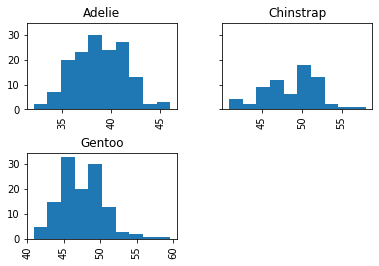

In [11]:
# Show the histogram per bill lenght
df.hist(column='bill_length_mm', by='species',sharey='true')
plt.show()

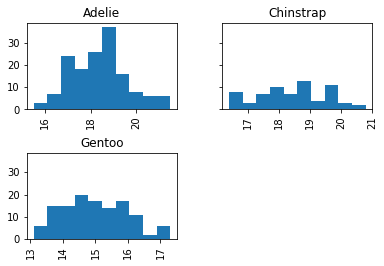

In [12]:
# Show the histogram per bill depth
df.hist(column='bill_depth_mm', by='species',sharey='true')
plt.show()

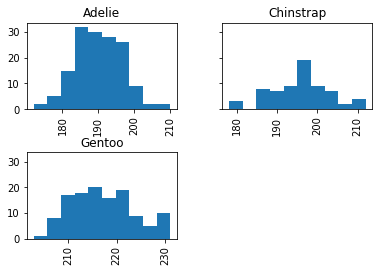

In [13]:
# Show the histogram per flipper length 
df.hist(column='flipper_length_mm', by='species',sharey='true')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


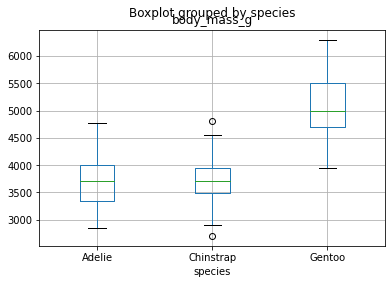

In [14]:
# Show a boxplot of body mass per species
df.boxplot(column='body_mass_g', by='species')
plt.show()

In [15]:
fig = px.box(df,x='species',y='body_mass_g', color='species')
fig.show()

In [16]:
# Show a bivariate plot of bill length and bill depth
fig = px.scatter(df, x='bill_length_mm', y='bill_depth_mm', color='species')
fig.show()

In [17]:
# Is there a way to be more effective?
fig = px.scatter_matrix(df, dimensions=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'], color='species')
fig.show()

In [18]:
# What percentage of Gentoo penguins weights less than 5000 (visually) 
# ecdf = empirical cumulative distribution frequency
fig = px.ecdf(df[df['species']=='Gentoo'],x='body_mass_g')
fig.show()

In [30]:
# Is there a difference between Adelie penguins from each island?
# alpha = 0.05
# reject_H0 = p_value < alpha 
Adelie_Dream = df[(df['species']=='Adelie') & (df['island']=='Dream')]
Adelie_Biscoe = df[(df['species']=='Adelie') & (df['island']=='Biscoe')]
Adelie_Torgersen = df[(df['species']=='Adelie') & (df['island']=='Torgersen')]


In [31]:
f_oneway(Adelie_Dream['body_mass_g'],Adelie_Biscoe['body_mass_g'],Adelie_Torgersen['body_mass_g'])

F_onewayResult(statistic=0.03204821591407108, pvalue=0.9684666047614272)

No se rechaza H0 

No se rechaza que los pesos promedio son iguales (H0)

No se puede rechazar que los pesos promedios son iguales 

In [21]:
# Show the boxplot of Adelie penguins by island
#fig = px.box(df[df['species']=='Adelie'], x = 'species', y= 'body_mass_g', color='island')
fig = px.box(df[df['species']=='Adelie'],y= 'body_mass_g', color='island')
fig.show()

In [25]:
#!pip install
import statsmodels.api as sm
import statsmodels as sms
from statsmodels.formula.api import ols


In [32]:
Adelie_Dream

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
30,31,Adelie,Dream,39.5,16.7,178.0,3250.0,female,2007
31,32,Adelie,Dream,37.2,18.1,178.0,3900.0,male,2007
32,33,Adelie,Dream,39.5,17.8,188.0,3300.0,female,2007
33,34,Adelie,Dream,40.9,18.9,184.0,3900.0,male,2007
34,35,Adelie,Dream,36.4,17.0,195.0,3325.0,female,2007
35,36,Adelie,Dream,39.2,21.1,196.0,4150.0,male,2007
36,37,Adelie,Dream,38.8,20.0,190.0,3950.0,male,2007
37,38,Adelie,Dream,42.2,18.5,180.0,3550.0,female,2007
38,39,Adelie,Dream,37.6,19.3,181.0,3300.0,female,2007
39,40,Adelie,Dream,39.8,19.1,184.0,4650.0,male,2007


In [39]:
adelie_dream = df[(df['species']== 'Adelie') & (df['island']== 'Dream')]['body_mass_g']
adelie_biscoe = df[(df['species']== 'Adelie') & (df['island']== 'Biscoe')]['body_mass_g']
adelie_torgersen = df[(df['species']== 'Adelie') & (df['island']== 'Torgersen')]['body_mass_g']

In [40]:
#mod = ols()
print(len(adelie_dream))
print(len(adelie_biscoe))
print(len(adelie_torgersen))
df_adelie = pd.DataFrame({'val':np.concatenate([adelie_dream, adelie_biscoe, adelie_torgersen]),
                          'id':np.repeat(['dream','biscoe', 'torgersen'],[len(adelie_dream),len(adelie_biscoe),len(adelie_torgersen)])})

56
44
51


In [43]:
mod = ols('val ~id', df_adelie).fit()
sm.stats.anova_lm(mod,type=1)

,df,sum_sq,mean_sq,F,PR(>F)
id,2.0,1.365461e+04,6827.304880,0.032048,0.968467
Residual,148.0,3.152878e+07,213032.291656,NaN,NaN


In [49]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.03205
Date:                Fri, 10 Jun 2022   Prob (F-statistic):              0.968
Time:                        21:54:08   Log-Likelihood:                -1139.1
No. Observations:                 151   AIC:                             2284.
Df Residuals:                     148   BIC:                             2293.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3709.6591     69.582     53.314      0.000    3572.157    3847.161
id[T.dream]       -21.2662     92.983     -0.229      0.819    -205.012     162.479
id[T.torgersen]    -3.2865     94.967     -0.035      0.972    -190.953     184.380
==============================================================================
Omnibus:                        5.656   Durbin-Watson:                   2.907
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.192
Skew:                           0.281   Prob(JB):                        0.123
Kurtosis:                       2.408   Cond. No.                         3.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
df_adelie


,val,id
0,3250.0,dream
1,3900.0,dream
2,3300.0,dream
3,3900.0,dream
4,3325.0,dream
...,...,...
146,4300.0,torgersen
147,3050.0,torgersen
148,4000.0,torgersen
149,3325.0,torgersen


In [ ]:
#falta una cuenta


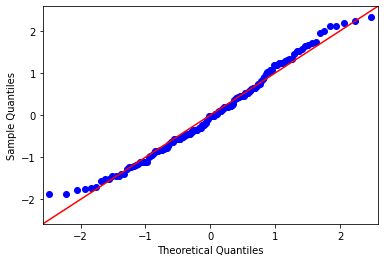

In [48]:
fig = sm.qqplot(mod.resid,fit=True,line='45')
plt.show()